In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 17.88 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
import tensorflow as tf

In [ ]:
!ls "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
def get_lines(file_name):
  with open(file_name, 'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text_with_line_numbers(file_name):
  input_lines = get_lines(file_name)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""

    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number ,abstract_line in enumerate(abstract_line_split):
        line_data ={}
        target_text_split = abstract_line.split("\t")

        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        line_data['total_lines'] =  len(abstract_line_split) - 1

        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples



In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

In [ ]:
val_samples[:10]

[{'target': 'BACKGROUND',
  'text': 'ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
  'line_number': 0,
  'total_lines': 9},
 {'target': 'BACKGROUND',
  'text': 'it is not clear whether these patients would benefit from antifungal treatment .',
  'line_number': 1,
  'total_lines': 9},
 {'target': 'OBJECTIVE',
  'text': 'we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .',
  'line_number': 2,
  'total_lines': 9},
 {'target': 'METHODS',
  'text': 'asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
  'line_number': 3,
  'total_lines': 9},
 {'targe

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

<Axes: xlabel='target'>

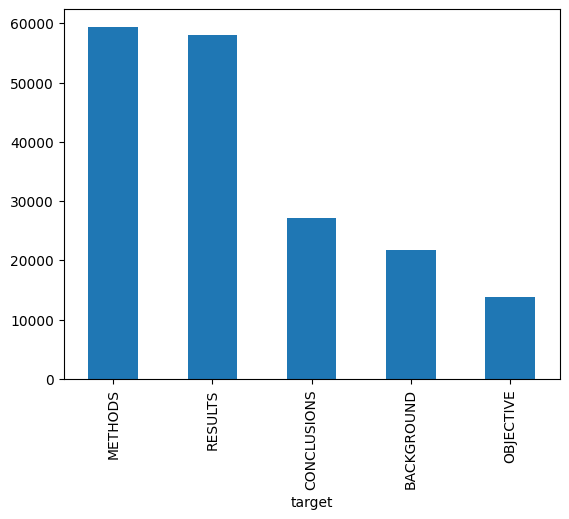

In [ ]:
train_df['target'].value_counts().plot(kind='bar')

In [ ]:
# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
val_labels_encoded = label_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1, 1))
test_labels_encoded = label_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

###CREATING OUR BASELINE MODEL

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Transform the email data into TF-IDF features
X = tfidf.fit_transform(train_df['text'])


In [ ]:
baseline_model = MultinomialNB()
baseline_model.fit(X, train_labels_encoded)

MultinomialNB()

In [ ]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Make predictions on the test set
y_pred = baseline_model.predict(tfidf.transform(test_df['text']))

# Evaluate the model
print("Accuracy:", accuracy_score(test_labels_encoded, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_labels_encoded, y_pred))
print("Classification Report:\n", classification_report(test_labels_encoded, y_pred))


Accuracy: 0.716674962667994
Confusion Matrix:
 [[1688  859  759   88  227]
 [ 278 2642  391    7 1253]
 [ 103   77 8683    7 1027]
 [ 520  420  968  294  131]
 [  19  186 1215    3 8290]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.47      0.54      3621
           1       0.63      0.58      0.60      4571
           2       0.72      0.88      0.79      9897
           3       0.74      0.13      0.22      2333
           4       0.76      0.85      0.80      9713

    accuracy                           0.72     30135
   macro avg       0.70      0.58      0.59     30135
weighted avg       0.71      0.72      0.69     30135



In [ ]:
test_df['text']

,text
0,this study analyzed liver function abnormaliti...
1,a post hoc analysis was conducted with the use...
2,liver function tests ( lfts ) were measured at...
3,survival analyses were used to assess the asso...
4,the percentage of patients with abnormal lfts ...
...,...
30130,there was a statistically significant between-...
30131,there were no statistically significant betwee...
30132,there was no significant association between s...
30133,no adverse effects were reported .


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import calculate_results


--2024-08-21 15:31:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-21 15:31:16 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
len(val_labels_encoded), len(val_sentences)

(30212, 30212)

In [ ]:
y_pred = baseline_model.predict(tfidf.transform(val_sentences))

In [ ]:
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=y_pred)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len, np.array(tf.reduce_max(sent_lens)) # return average sentence length (in tokens)


(26.338269273494777, array(296, dtype=int32))

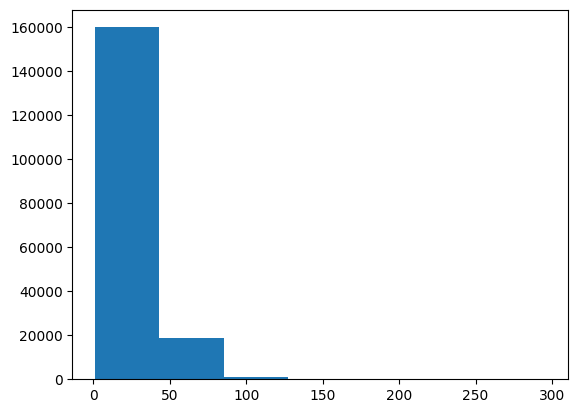

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);


In [ ]:

# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
from tensorflow.keras.layers import TextVectorization

max_tokens = 68000

text_vectorizer = TextVectorization(max_tokens, output_sequence_length = output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(64841, 128)

In [ ]:
embedding_layer(text_vectorizer(train_sentences))

<tf.Tensor: shape=(180040, 55, 128), dtype=float32, numpy=
array([[[ 0.03765524, -0.04362328,  0.00291143, ...,  0.01130453,
          0.02152177,  0.03645447],
        [ 0.04538837, -0.00730548,  0.02129697, ..., -0.02190324,
         -0.03450856,  0.02459088],
        [-0.03846332, -0.00223545,  0.02945203, ...,  0.03072557,
         -0.01600373, -0.0139245 ],
        ...,
        [ 0.04883236,  0.02770967,  0.04902819, ...,  0.0373607 ,
         -0.00239659,  0.0305997 ],
        [ 0.04883236,  0.02770967,  0.04902819, ...,  0.0373607 ,
         -0.00239659,  0.0305997 ],
        [ 0.04883236,  0.02770967,  0.04902819, ...,  0.0373607 ,
         -0.00239659,  0.0305997 ]],

       [[ 0.03539686,  0.03541341, -0.03021458, ...,  0.00903789,
          0.04488565,  0.0112871 ],
        [-0.01606746, -0.0455091 , -0.01594975, ...,  0.03282485,
          0.00503762,  0.02933839],
        [ 0.03417255,  0.02502683, -0.01715921, ...,  0.02406326,
          0.04626875,  0.01638781],
        

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

CREATING A CONV1D MODEL

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding_layer(x)
x = layers.Conv1D(64, (5))(x)
x = layers.Conv1D(32, (3))(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Flatten()(x)
x = layers.Dense(32)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation('softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(tf.keras.optimizers.Adam(),
                tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 51, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 49, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,348,069 (31.85 MB)

 Trainable params: 8,348,069 (31.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_Conv1D_model_1 = model_1.fit((train_dataset), epochs=3, validation_data=val_dataset)

In [ ]:
model_1_pred_probs = model_1.predict(test_dataset)

In [ ]:
model_1_preds = class_names[tf.argmax(model_1_pred_probs, axis=1)]

In [ ]:
results_model_1 = calculate_results(class_names[tf.argmax(test_labels_one_hot, axis=1)], model_1_preds)
results_model_1, baseline_results

In [ ]:
import tensorflow_hub as hub
class EmbedLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EmbedLayer, self).__init__(**kwargs)
        self.use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name='universal_sentence_encoder',
                                        dtype=tf.string,
                                        input_shape=[])
    def call(self, inputs):
        return self.use_layer(inputs)

Creating a model with pretrained backbone


In [ ]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
x = EmbedLayer()(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(x) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=0'

In [ ]:
history_use_model_2 = model_2.fit((train_dataset),steps_per_epoch=int(len(train_dataset) * 0.1), epochs=3, validation_data=val_dataset)

In [ ]:
model_2.evaluate(val_dataset)

In [ ]:
model_2_pred_probs = model_2.predict(test_dataset)
model_2_preds = class_names[tf.argmax(model_2_pred_probs, axis=1)]
results_model_2 = calculate_results(class_names[tf.argmax(test_labels_one_hot, axis=1)], model_2_preds)
results_model_2, baseline_results

In [ ]:
import random
random_training_sentence = random.choice(train_sentences)

# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)

'=   @   ,   p   =   @   )   ,   a n d   t h e   g r o u p s   d i d   n o t   s e p a r a t e   a t   w e e k   @   (   t .   =   - @   ,   p   =   @   )   .'

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len


149.3662574983337

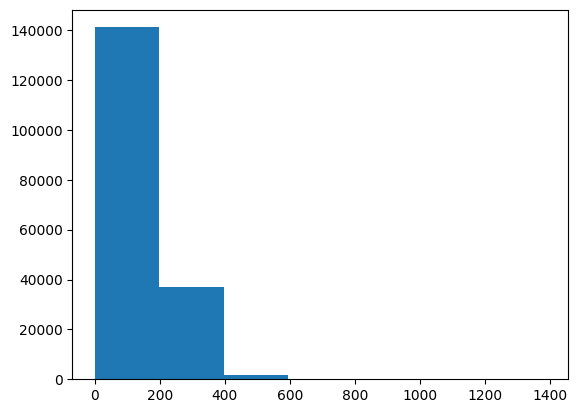

In [ ]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
d e p e n d e n c y   i s   d e f i n e d   b y   a   s c o r e   o f   @ - @   b a s e d   o n   t h e   m o d i f i e d   r a n k i n   s c a l e   (   m r s   )   .

Length of chars: 67

Vectorized chars:
[[10  2 14  2  6 10  2  6 11 19  4  9 10  2 17  4  6  2 10 22 19  5  9 11
   7  8  2  7 17 22  5  9  2 10  7  6  3 13  2 15  7 10  4 17  4  2 10  8
   5  6 23  4  6  9 11  5 12  2 15  8  9  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  

In [ ]:
char_embedding = tf.keras.layers.Embedding(NUM_CHAR_TOKENS,
                                           25,
                                           mask_zero=False,
                                           name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embedding(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")


Charified text (before vectorization and embedding):
d e p e n d e n c y   i s   d e f i n e d   b y   a   s c o r e   o f   @ - @   b a s e d   o n   t h e   m o d i f i e d   r a n k i n   s c a l e   (   m r s   )   .

Embedded chars (after vectorization and embedding):
[[[ 1.7116379e-02 -4.3872070e-02  2.2888843e-02 ... -1.1074282e-02
    2.7289007e-02 -1.6256370e-02]
  [-3.0968452e-02 -1.5109338e-02 -2.4558067e-02 ... -1.7171130e-03
   -2.6929155e-03 -3.6080621e-02]
  [-3.8766287e-02  3.5584155e-02 -1.8584706e-02 ... -4.0630449e-02
    1.3324846e-02 -3.6092889e-02]
  ...
  [-4.8056729e-03  1.4494050e-02 -1.9866873e-02 ...  2.8049480e-02
   -7.9296529e-05  1.0171436e-02]
  [-4.8056729e-03  1.4494050e-02 -1.9866873e-02 ...  2.8049480e-02
   -7.9296529e-05  1.0171436e-02]
  [-4.8056729e-03  1.4494050e-02 -1.9866873e-02 ...  2.8049480e-02
   -7.9296529e-05  1.0171436e-02]]]

Character embedding shape: (1, 290, 25)


In [ ]:
inputs = layers.Input((1, ), dtype=tf.string)
x = char_vectorizer(inputs)
x = char_embedding(x)
x = layers.Conv1D(64, 5, padding='same')(x)
x = layers.Activation('relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(64)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation('softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(tf.keras.optimizers.Adam(),
                tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])


In [ ]:
model_3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_vectorizer (TextVectorization)  │ (None, 290)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_embed (Embedding)               │ (None, 290, 25)             │           1,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 290, 64)             │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 290, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,715 (104.36 KB)

 Trainable params: 26,715 (104.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
#history_char_embed_model_3 = model_3.fit(train_char_dataset, epochs=5, steps_per_epoch=int(0.1 * len(train_char_dataset)))

In [ ]:
#model_3.evaluate(val_char_dataset)

In [ ]:
#model_3_pred_probs = model_3.predict(val_char_dataset)
#model_3_preds = class_names[tf.argmax(model_3_pred_probs, axis=1)]
#results_model_3 = calculate_results(class_names[tf.argmax(val_labels_one_hot, axis=1)], model_3_preds)
#results_model_3, baseline_results

###CREATING A MIXED MODEL

In [ ]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name='token_input')
token_embeddings = EmbedLayer()(token_inputs)
token_outputs = layers.Dense(128, activation='relu')(token_embeddings)

token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = layers.Input(shape=[], dtype=tf.string, name='char_input')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)

char_model = tf.keras.Model(char_inputs, char_bi_lstm)

concat_layer = layers.Concatenate()([token_model.output, char_model.output])

dropout_layer_1 = layers.Dropout(0.5)(concat_layer)

dense_layer_1 = layers.Dense(128, 'relu')(dropout_layer_1)

dropout_layer_2 = layers.Dropout(0.5)(dense_layer_1)

output_layer = layers.Dense(num_classes, 'softmax')(dropout_layer_2)

model_4 = tf.keras.Model(inputs=[token_inputs, char_inputs],
                         outputs=output_layer)





In [ ]:
model_4.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ char_input (InputLayer)   │ (None)                 │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_input (InputLayer)  │ (None)                 │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_vectorizer           │ (None, 290)            │              0 │ char_input[0][0]       │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_layer_1             │ (None, 512)            │              0 │ token_input[0][0]      │
│ (EmbedLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_embed (Embedding)    │ (None, 290, 25)        │          1,750 │ char_vectorizer[1][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │         65,664 │ embed_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 48)             │          9,600 │ char_embed[1][0]       │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 176)            │              0 │ dense_7[0][0],         │
│                           │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 176)            │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         22,656 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 5)              │            645 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,315 (391.86 KB)

 Trainable params: 100,315 (391.86 KB)

 Non-trainable params: 0 (0.00 B)

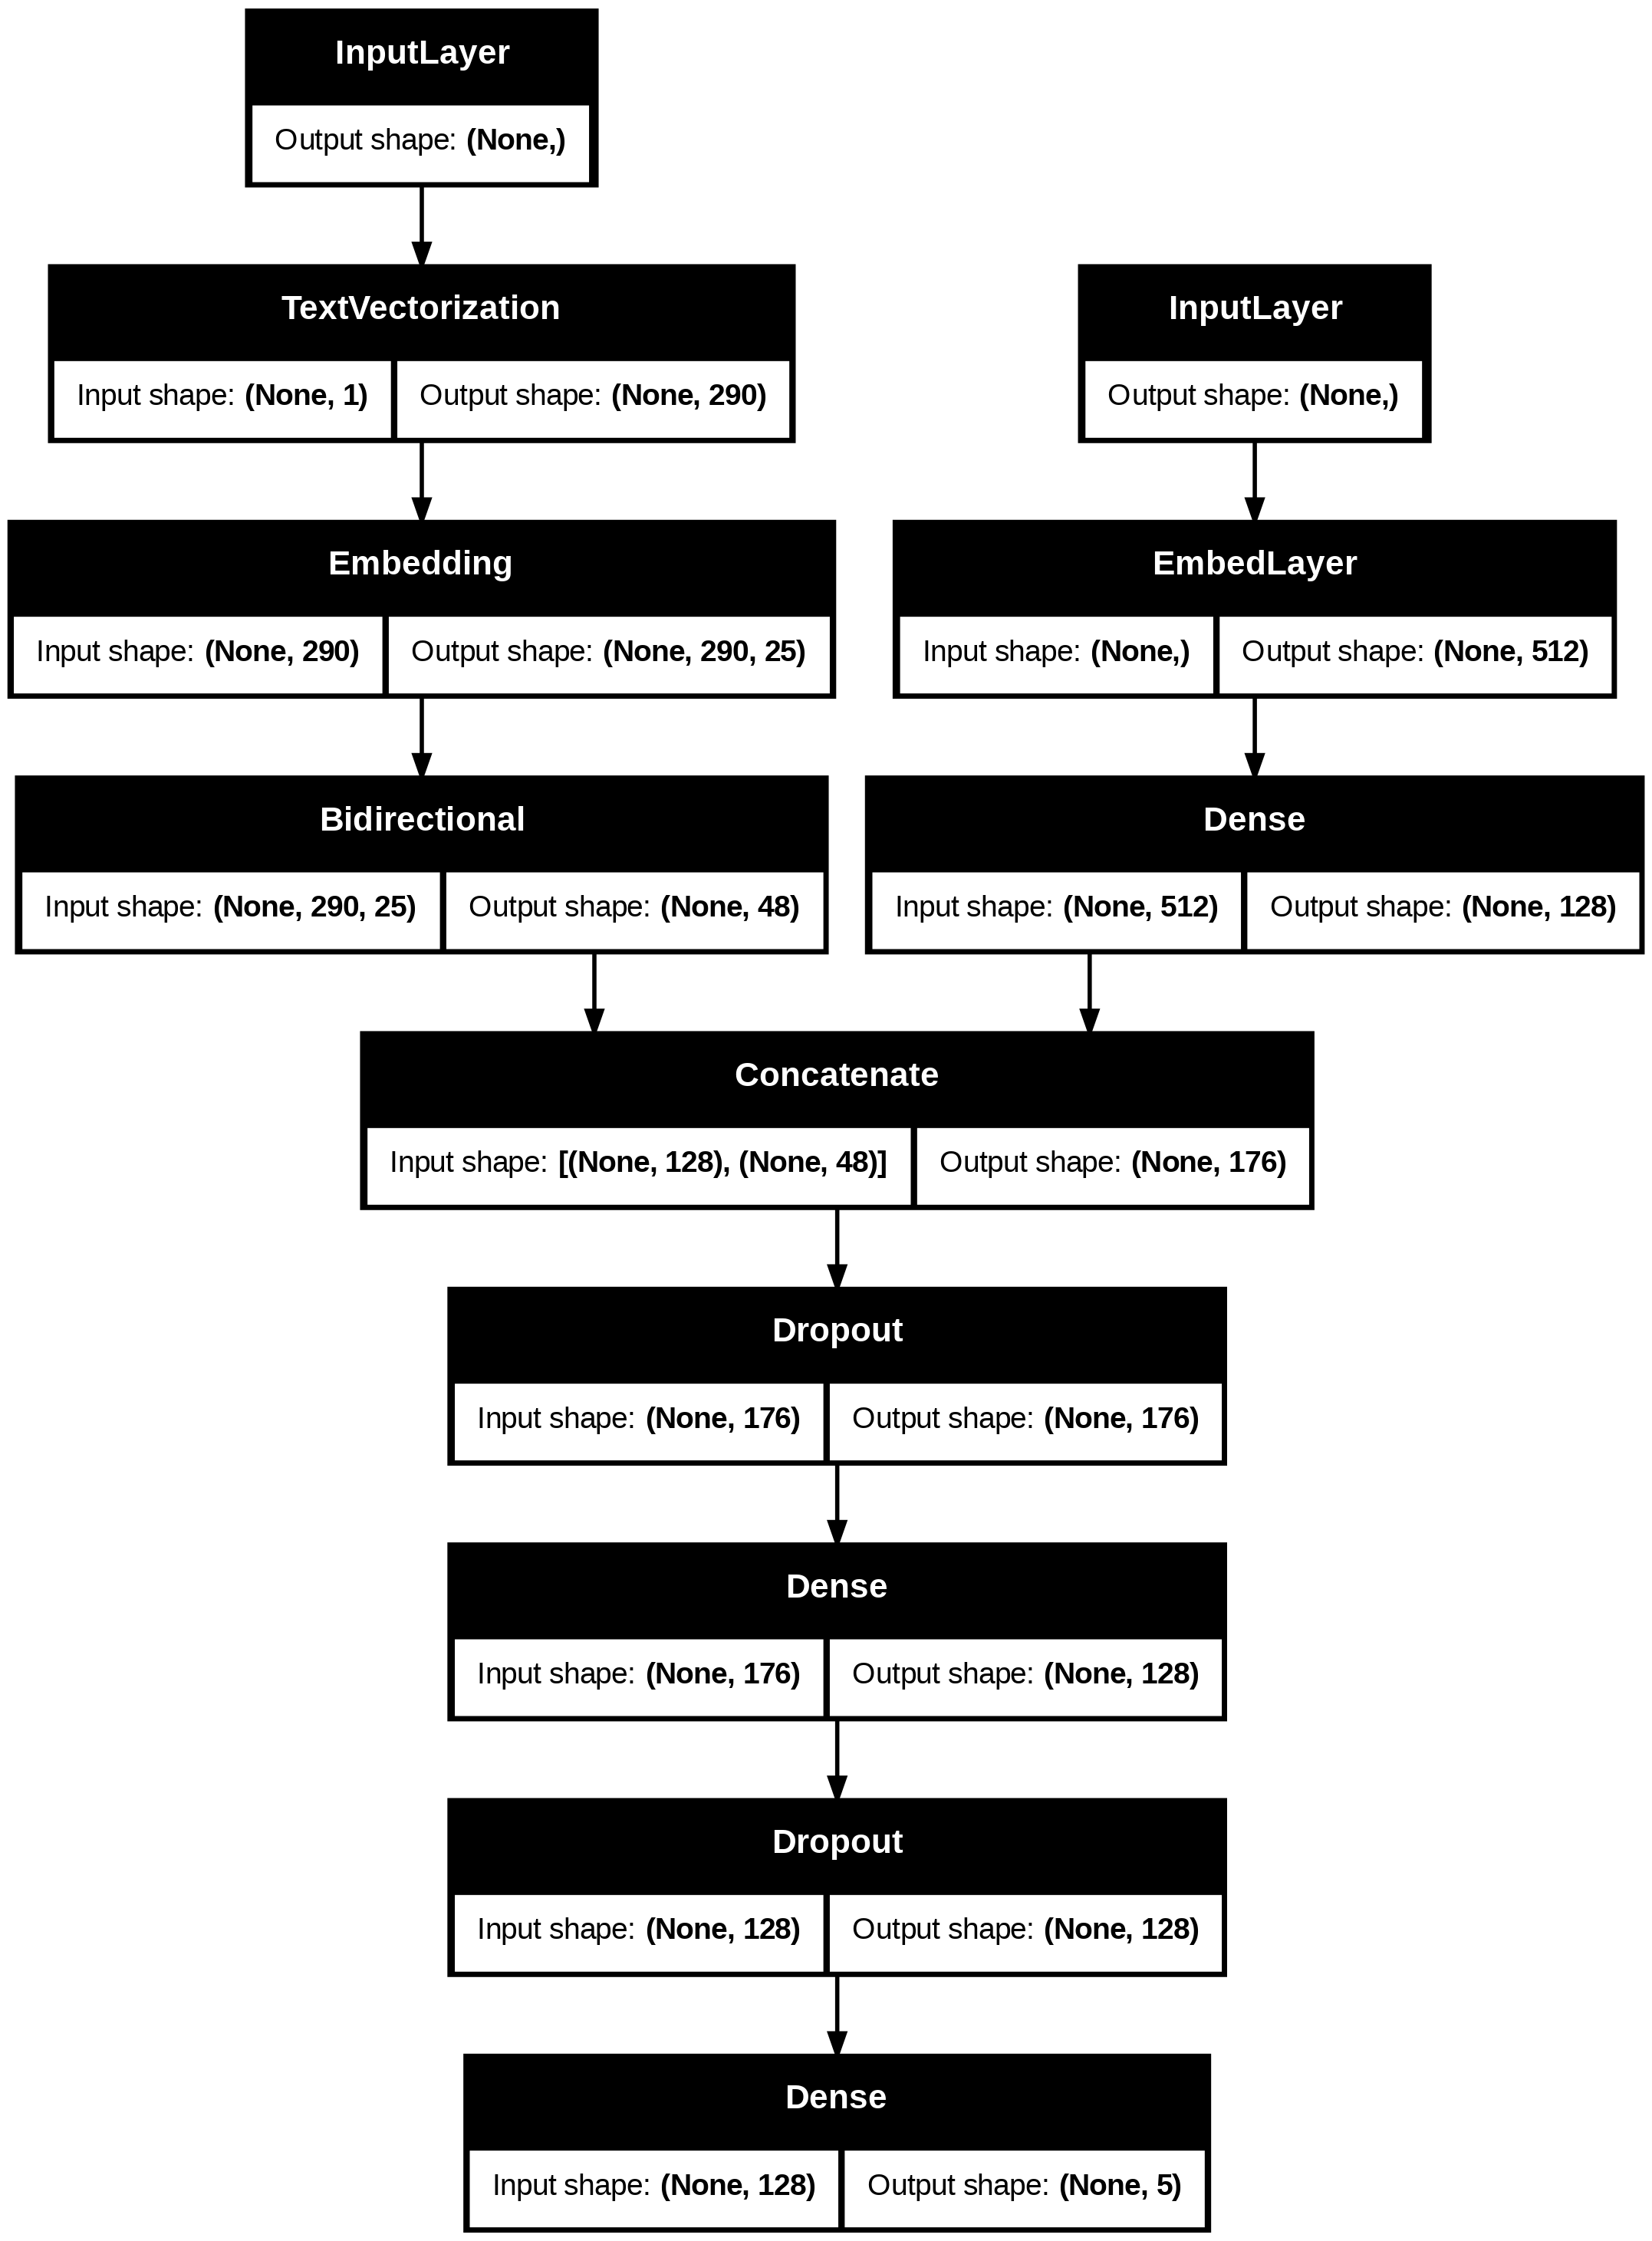

In [ ]:
from keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [ ]:
model_4.compile(tf.keras.optimizers.Adam(),
                tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip(train_char_token_data, train_char_token_labels)

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip(val_char_token_data, val_char_token_labels)

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
#history_hybrid_model_4 = model_4.fit(train_char_token_dataset, epochs=3, steps_per_epoch=int(0.1 * len(train_char_token_dataset)))

In [ ]:
#results_model_4 = model_4.evaluate(val_char_token_dataset)

<Axes: xlabel='line_number'>

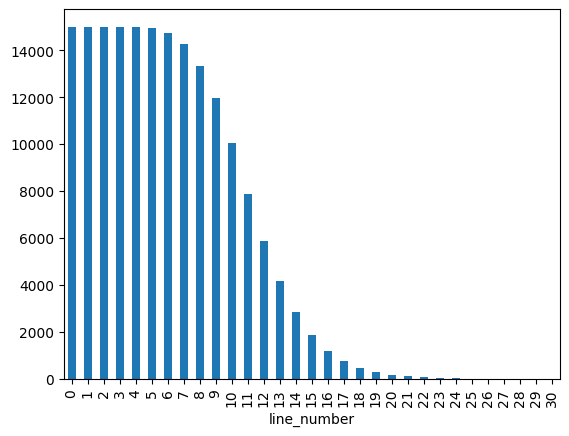

In [ ]:
import matplotlib.pyplot as plt
train_df['line_number'].value_counts().plot(kind='bar')


In [ ]:
train_lines_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth=15)
val_lines_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth=15)

<Axes: xlabel='total_lines'>

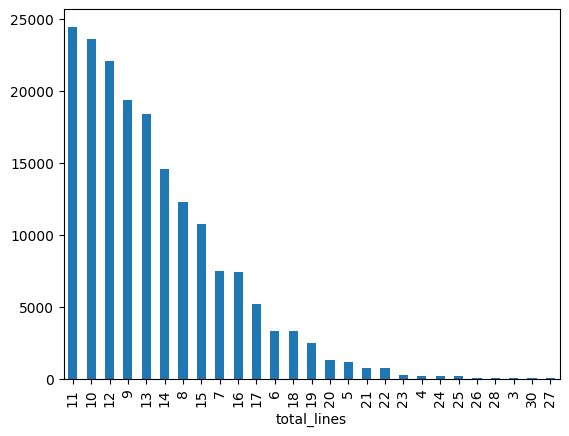

In [ ]:
train_df['total_lines'].value_counts().plot(kind='bar')

In [ ]:
np.percentile(train_df.total_lines, 98)

20.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth=20)

#CREATING OUR MOST COMPLEX MODEL SO FAR

In [ ]:
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = EmbedLayer()(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = EmbedLayer()(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

TypeError: Exception encountered when calling EmbedLayer.call().

[1mCould not automatically infer the output shape / dtype of 'embed_layer_8' (of type EmbedLayer). Either the `EmbedLayer.call()` method is incorrect, or you need to implement the `EmbedLayer.compute_output_spec() / compute_output_shape()` method. Error encountered:

Exception encountered when calling layer 'universal_sentence_encoder' (type KerasLayer).

in user code:

    File "/usr/local/lib/python3.10/dist-packages/tensorflow_hub/keras_layer.py", line 242, in call  *
        result = f()

    TypeError: Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(None, 290), dtype=tf.int64, name=None) to TensorSpec(shape=<unknown>, dtype=tf.string, name=None)`. Received args: (<tf.Tensor 'Placeholder:0' shape=(None, 290) dtype=int64>,) and kwargs: {} for signature: (inputs: TensorSpec(shape=<unknown>, dtype=tf.string, name=None)).


Call arguments received by layer 'universal_sentence_encoder' (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 290), dtype=int64)
  • training=None[0m

Arguments received by EmbedLayer.call():
  • args=('<KerasTensor shape=(None, 290), dtype=int64, sparse=False, name=keras_tensor_265>',)
  • kwargs=<class 'inspect._empty'>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub

# Define EmbedLayer class
class EmbedLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EmbedLayer, self).__init__(**kwargs)
        self.use_layer = hub.KerasLayer(
            "https://tfhub.dev/google/universal-sentence-encoder/4",
            trainable=False,
            name='universal_sentence_encoder',
            dtype=tf.string,
            input_shape=[])

    def call(self, inputs):
        return self.use_layer(inputs)

# Token Model
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = EmbedLayer()(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs, outputs=token_outputs)

# Char Model
char_inputs = layers.Input(shape=[], dtype="string", name="char_inputs")
char_embeddings = EmbedLayer()(char_inputs)

# Use a Lambda layer to reshape the tensor
char_embeddings = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(char_embeddings)

# Now the shape should be [batch_size, 1, embedding_dim]
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs, outputs=char_bi_lstm)

# Line Number Model
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
line_number_outputs = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs, outputs=line_number_outputs)

# Total Lines Model
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
total_lines_outputs = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs, outputs=total_lines_outputs)

# Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# Output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# Final Model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)


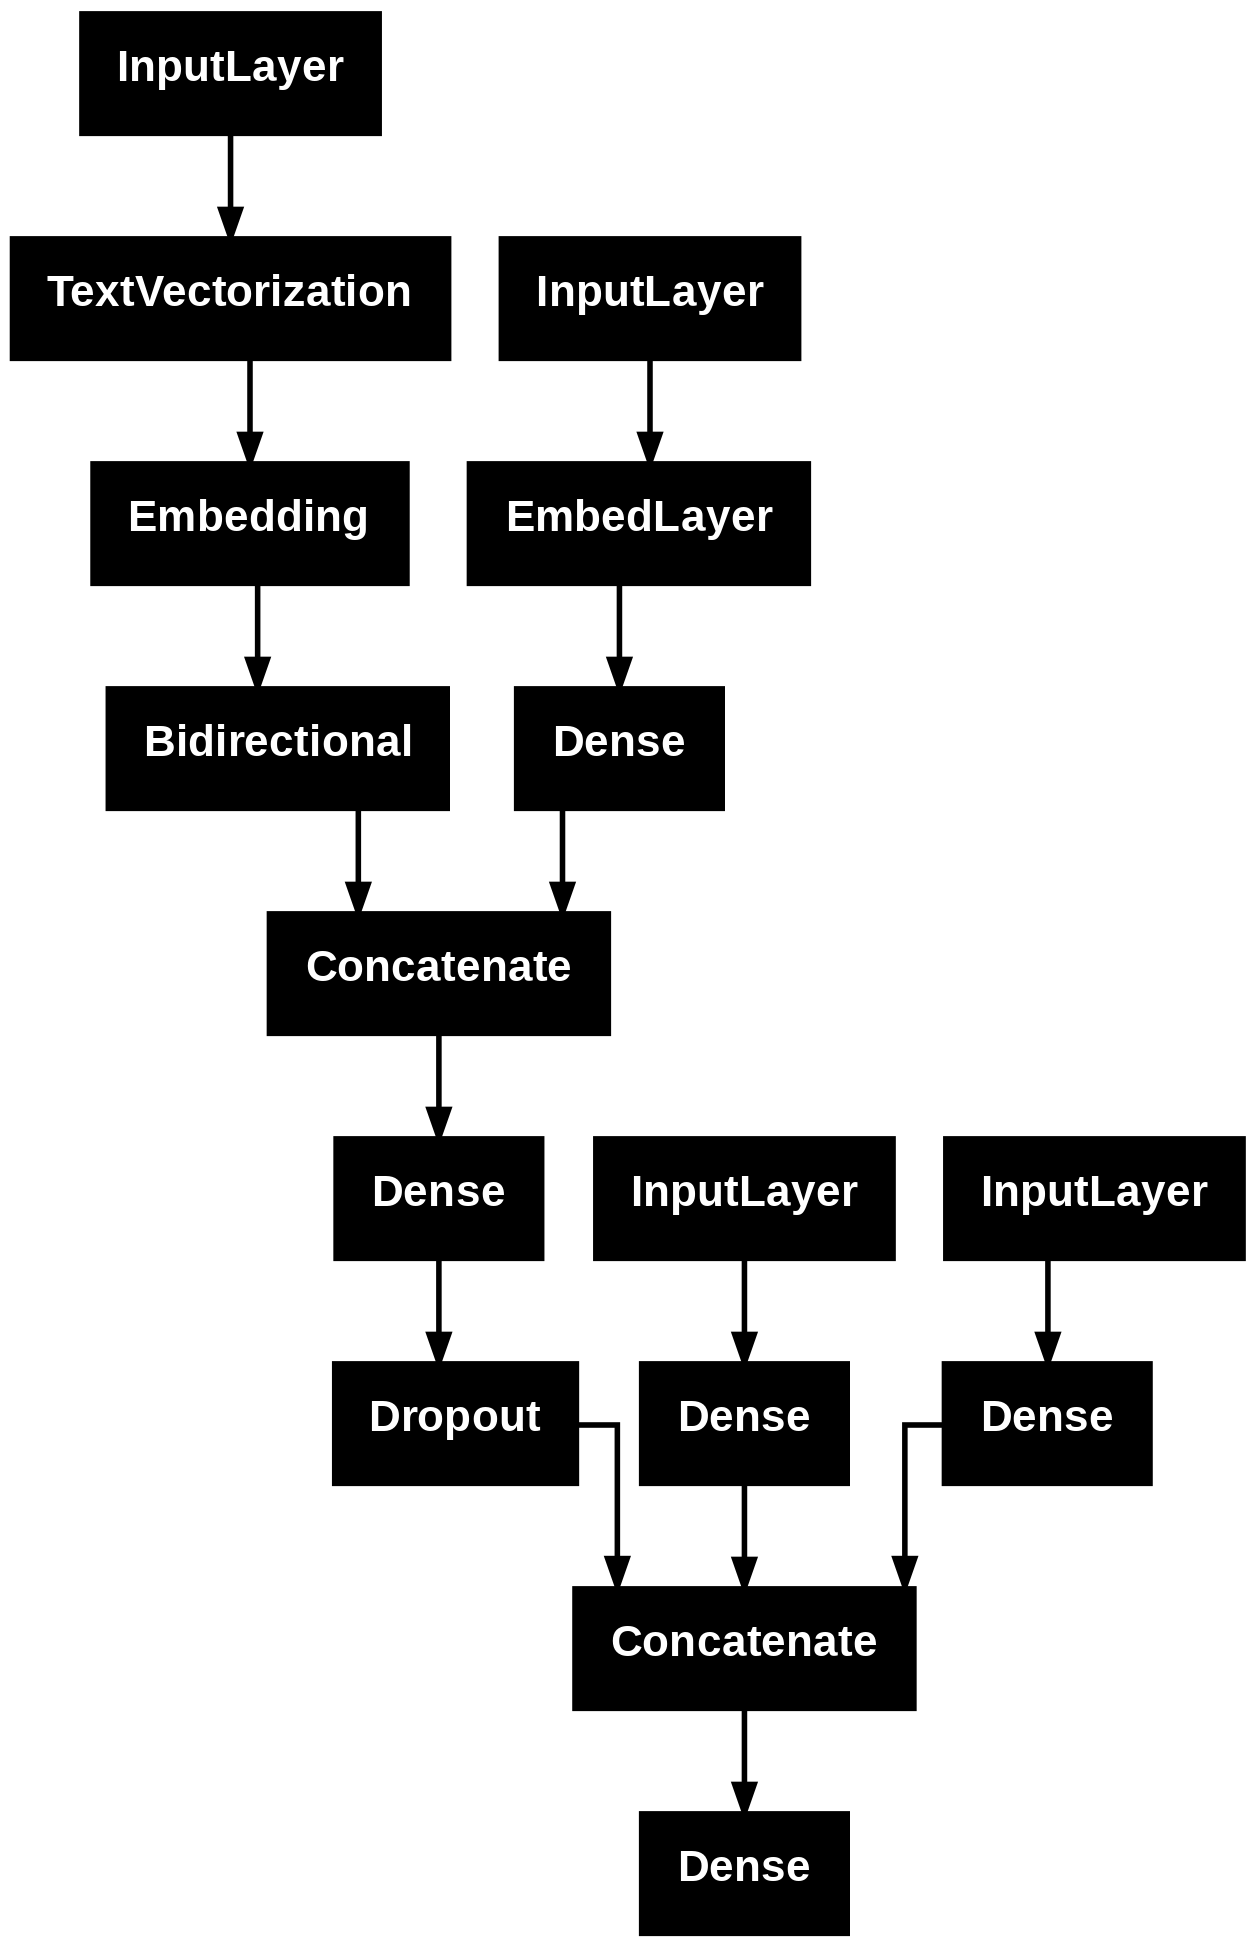

In [ ]:
tf.keras.utils.plot_model(model_5)

In [ ]:
model_5.compile(tf.keras.optimizers.Adam(),
                tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                metrics=['accuracy'])

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_lines_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_lines_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
history_all_out_model_5 = model_5.fit(train_pos_char_token_dataset, steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)), epochs=3)

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.6303 - loss: 1.2295
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8027 - loss: 0.9793
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8138 - loss: 0.9593


In [ ]:
results_model_5 = model_5.evaluate(val_pos_char_token_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.7969 - loss: 0.9784


In [ ]:
results_model_5

[0.9784712791442871, 0.7984906435012817]

In [ ]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step


array([[0.49340707, 0.11855854, 0.01246687, 0.3563153 , 0.01925222],
       [0.6821303 , 0.04489361, 0.05497836, 0.20987935, 0.00811842],
       [0.30259722, 0.07194713, 0.20903306, 0.36611924, 0.05030337],
       ...,
       [0.02862268, 0.13664612, 0.02983366, 0.03129316, 0.77360433],
       [0.02143761, 0.2999067 , 0.07610238, 0.02248053, 0.5800728 ],
       [0.20642245, 0.63940346, 0.0846208 , 0.03181815, 0.03773507]],
      dtype=float32)

In [ ]:
model_5_preds = class_names[tf.argmax(model_5_pred_probs, axis=1)]
model_5_preds

array(['BACKGROUND', 'BACKGROUND', 'OBJECTIVE', ..., 'RESULTS', 'RESULTS',
       'CONCLUSIONS'], dtype=object)

In [ ]:
class_names[tf.argmax(val_labels_one_hot, axis=1)]

array(['BACKGROUND', 'BACKGROUND', 'OBJECTIVE', ..., 'METHODS', 'METHODS',
       'METHODS'], dtype=object)

In [ ]:
model_5_results = calculate_results(y_true=class_names[tf.argmax(val_labels_one_hot, axis=1)],
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 79.84906659605456,
 'precision': 0.801536512214626,
 'recall': 0.7984906659605455,
 'f1': 0.7979532267433285}